In [189]:
import os

import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

os.chdir('C:\\Users\\manon\\OneDrive\\Documents\\OpenClassrooms\\Projet5')

In [11]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Id,Body,Tags
0,4,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...
1,6,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>
2,9,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>
3,11,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...
4,13,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...


In [4]:
data.Body[0]

'<p>I want to use a <code>Track-Bar</code> to change a <code>Form</code>\'s opacity.</p>\n<p>This is my code:</p>\n<pre class="lang-cs prettyprint-override"><code>decimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n</code></pre>\n<p>When I build the application, it gives the following error:</p>\n<blockquote>\n<pre class="lang-none prettyprint-override"><code>Cannot implicitly convert type decimal to double\n</code></pre>\n</blockquote>\n<p>I have tried using <code>trans</code> and <code>double</code>, but then the <code>Control</code> doesn\'t work. This code worked fine in a past VB.NET project.</p>\n<p>How do I fix this?</p>\n'

In [5]:
texte = BeautifulSoup(data.Body[0]).get_text()

In [6]:
texte

"I want to use a Track-Bar to change a Form's opacity.\nThis is my code:\ndecimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n\nWhen I build the application, it gives the following error:\n\nCannot implicitly convert type decimal to double\n\n\nI have tried using trans and double, but then the Control doesn't work. This code worked fine in a past VB.NET project.\nHow do I fix this?\n"

In [7]:
nltk.word_tokenize(texte)

['I',
 'want',
 'to',
 'use',
 'a',
 'Track-Bar',
 'to',
 'change',
 'a',
 'Form',
 "'s",
 'opacity',
 '.',
 'This',
 'is',
 'my',
 'code',
 ':',
 'decimal',
 'trans',
 '=',
 'trackBar1.Value',
 '/',
 '5000',
 ';',
 'this.Opacity',
 '=',
 'trans',
 ';',
 'When',
 'I',
 'build',
 'the',
 'application',
 ',',
 'it',
 'gives',
 'the',
 'following',
 'error',
 ':',
 'Can',
 'not',
 'implicitly',
 'convert',
 'type',
 'decimal',
 'to',
 'double',
 'I',
 'have',
 'tried',
 'using',
 'trans',
 'and',
 'double',
 ',',
 'but',
 'then',
 'the',
 'Control',
 'does',
 "n't",
 'work',
 '.',
 'This',
 'code',
 'worked',
 'fine',
 'in',
 'a',
 'past',
 'VB.NET',
 'project',
 '.',
 'How',
 'do',
 'I',
 'fix',
 'this',
 '?']

In [8]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [9]:
tokenizer.tokenize(texte.lower())

['i',
 'want',
 'to',
 'use',
 'a',
 'track',
 'bar',
 'to',
 'change',
 'a',
 'form',
 's',
 'opacity',
 'this',
 'is',
 'my',
 'code',
 'decimal',
 'trans',
 'trackbar1',
 'value',
 '5000',
 'this',
 'opacity',
 'trans',
 'when',
 'i',
 'build',
 'the',
 'application',
 'it',
 'gives',
 'the',
 'following',
 'error',
 'cannot',
 'implicitly',
 'convert',
 'type',
 'decimal',
 'to',
 'double',
 'i',
 'have',
 'tried',
 'using',
 'trans',
 'and',
 'double',
 'but',
 'then',
 'the',
 'control',
 'doesn',
 't',
 'work',
 'this',
 'code',
 'worked',
 'fine',
 'in',
 'a',
 'past',
 'vb',
 'net',
 'project',
 'how',
 'do',
 'i',
 'fix',
 'this']

In [18]:
BeautifulSoup(data["Body"][0]).get_text()

"I want to use a Track-Bar to change a Form's opacity.\nThis is my code:\ndecimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n\nWhen I build the application, it gives the following error:\n\nCannot implicitly convert type decimal to double\n\n\nI have tried using trans and double, but then the Control doesn't work. This code worked fine in a past VB.NET project.\nHow do I fix this?\n"

In [66]:
data["Tokenise"] = data["Body"].apply(BeautifulSoup)

C:\Users\manon\anaconda3\lib\site-packages\pandas\core\series.py:3848: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 3848 of the file C:\Users\manon\anaconda3\lib\site-packages\pandas\core\series.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  mapped = lib.map_infer(values, f, convert=convert_dtype)


In [67]:
data["Tokenise"] = data["Tokenise"].apply(BeautifulSoup.get_text)

In [68]:
data["Tokenise"] = data["Tokenise"].apply(str.lower).apply(tokenizer.tokenize)

In [69]:
data

,Id,Body,Tags,Tokenise
0,4,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,"[i, want, to, use, a, track, bar, to, change, ..."
1,6,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>,"[i, have, an, absolutely, positioned, div, con..."
2,9,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>,"[given, a, datetime, representing, a, person, ..."
3,11,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,"[given, a, specific, datetime, value, how, do,..."
4,13,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,"[is, there, a, standard, way, for, a, web, ser..."
...,...,...,...,...
49995,396181,<p>I'm trying to list the files in a directory...,<macos><unix><list><shell><file>,"[i, m, trying, to, list, the, files, in, a, di..."
49996,396183,<p>I'm trying to use SDL in C++ with Visual St...,<c++><visual-studio><sdl>,"[i, m, trying, to, use, sdl, in, c, with, visu..."
49997,396191,<p>Is it cool?</p>\n\n<p>IMO one-liners reduce...,<coding-style>,"[is, it, cool, imo, one, liners, reduces, the,..."
49998,396193,<p>I'm trying to implement a version control s...,<version-control>,"[i, m, trying, to, implement, a, version, cont..."


In [70]:
stop = nltk.corpus.stopwords.words('english')

In [35]:
freq_mots = data["Tokenise"].apply(Counter).sum()

In [36]:
%store freq_mots

Stored 'freq_mots' (Counter)


In [38]:
freq_mots.most_common(100)

[('the', 251961),
 ('i', 192948),
 ('to', 180982),
 ('a', 151918),
 ('is', 92402),
 ('and', 89247),
 ('in', 80469),
 ('of', 79566),
 ('that', 68559),
 ('it', 67128),
 ('this', 60776),
 ('for', 52847),
 ('have', 42589),
 ('on', 36893),
 ('be', 36703),
 ('but', 35144),
 ('with', 35138),
 ('can', 30469),
 ('my', 29727),
 ('if', 29712),
 ('as', 28807),
 ('t', 28585),
 ('an', 28316),
 ('not', 27654),
 ('do', 27075),
 ('or', 26939),
 ('s', 25298),
 ('m', 25238),
 ('there', 25177),
 ('are', 24478),
 ('what', 23955),
 ('from', 23309),
 ('like', 23017),
 ('so', 21961),
 ('using', 20912),
 ('would', 20614),
 ('you', 20392),
 ('how', 20328),
 ('1', 18544),
 ('any', 18481),
 ('code', 17994),
 ('use', 17987),
 ('0', 17703),
 ('way', 17367),
 ('when', 17162),
 ('some', 16967),
 ('which', 15965),
 ('all', 14936),
 ('at', 14895),
 ('file', 14691),
 ('get', 14677),
 ('am', 14602),
 ('c', 14573),
 ('one', 14097),
 ('want', 13834),
 ('new', 13322),
 ('class', 12753),
 ('we', 12458),
 ('data', 12394),
 ('

In [44]:
plus_frequents = [row[0] for row in freq_mots.most_common(100)]

In [71]:
stop.extend(plus_frequents)

In [72]:
data["Tokenise"] = data["Tokenise"].apply(lambda x: [item for item in x if item not in stop])

In [73]:
ps = nltk.stem.PorterStemmer()

In [74]:
data["Tokenise"] = data["Tokenise"].apply(lambda x: [ps.stem(item) for item in x])

In [75]:
data

,Id,Body,Tags,Tokenise
0,4,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,"[track, bar, chang, form, opac, decim, tran, t..."
1,6,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>,"[absolut, posit, div, contain, sever, children..."
2,9,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>,"[given, datetim, repres, person, birthday, cal..."
3,11,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,"[given, specif, datetim, display, rel, hour, a..."
4,13,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,"[standard, abl, determin, timezon, within, pag..."
...,...,...,...,...
49995,396181,<p>I'm trying to list the files in a directory...,<macos><unix><list><shell><file>,"[tri, list, file, directori, mac, os, x, promp..."
49996,396183,<p>I'm trying to use SDL in C++ with Visual St...,<c++><visual-studio><sdl>,"[tri, sdl, visual, studio, 2008, express, foll..."
49997,396191,<p>Is it cool?</p>\n\n<p>IMO one-liners reduce...,<coding-style>,"[cool, imo, liner, reduc, readabl, make, debug..."
49998,396193,<p>I'm trying to implement a version control s...,<version-control>,"[tri, implement, version, control, us, design,..."


In [76]:
data["Tokenise"] = data["Tokenise"].apply(' '.join)

In [77]:
cv = CountVectorizer()

In [78]:
tf = cv.fit_transform(data.Tokenise)

In [127]:
%%time
ratios = list()
for i in range(70):
    svd = TruncatedSVD(n_components=i*10).fit(tf)
    ratios.append(svd.explained_variance_ratio_.sum())

Wall time: 14min 44s


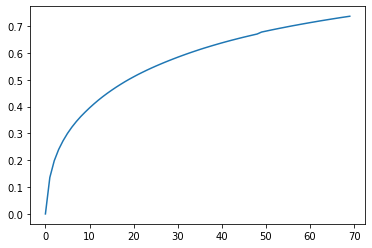

In [132]:
plt.plot(ratios)

In [135]:
svd = TruncatedSVD(n_components=1200).fit(tf)

In [136]:
svd.explained_variance_ratio_.sum()

0.8211949976528582

In [80]:
lda = LatentDirichletAllocation()

In [81]:
%%time
lda.fit(tf)

Wall time: 17min 51s


LatentDirichletAllocation()

In [82]:
lda.components_

array([[1.00013814e-01, 1.00011089e-01, 1.24481070e+00, ...,
        1.00000000e-01, 1.00000000e-01, 1.00015693e-01],
       [2.06880752e+00, 1.00012218e-01, 2.23958746e+00, ...,
        1.00009385e-01, 1.00000000e-01, 1.00000000e-01],
       [4.40503715e+02, 5.32764954e+01, 1.00051424e-01, ...,
        1.00000000e-01, 1.00000000e-01, 1.00488957e-01],
       ...,
       [1.01001735e-01, 1.73512783e+01, 4.65080195e+00, ...,
        1.00000000e-01, 1.09996455e+00, 1.00011380e-01],
       [1.00006215e-01, 2.04627709e+01, 1.00005410e-01, ...,
        1.00000000e-01, 1.00035453e-01, 1.00000000e-01],
       [1.00006699e-01, 9.85888832e-01, 3.88029359e+00, ...,
        1.00007348e-01, 1.00000000e-01, 1.00000000e-01]])

In [83]:
cv.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '00000000',
 '000000000',
 '0000000000',
 '000000000000',
 '0000000000000000',
 '00000000000000001',
 '0000000000000007779553950749686919152736663818359374',
 '0000000000000100',
 '0000000000001000',
 '0000000000001100',
 '000000000000302d00000003abdd0ab33759ecaaaf88a04568d6b035df3281225765625370686572655f506f7274616c',
 '000000000000303000000003abdd0ab33759ecaaaf88a04568d6b035df3281225765625370686572655f506f7274616c',
 '000000000000303100000003abdd0ab33759ecaaaf88a04568d6b035df3281225765625370686572655f506f7274616c',
 '000000000000303200000003abdd0ab33759ecaaaf88a04568d6b035df3281225765625370686572655f506f7274616c',
 '0000000000079',
 '000000000046',
 '0000000000555555moredata',
 '0000000000e',
 '0000000001',
 '000000001234',
 '0000000019edea70',
 '0000000019edead0',
 '0000000019edeb50',
 '00000001',
 '000000018000bdb8',
 '000000018000bdbf',
 '000000018000bdc4',
 '000000018000bdc5',
 '00000002',
 '00000003',
 '00000004',
 '0000

In [209]:
def plot_top_words(model, feature_names, n_lines, n_top_words, title):
    """Cette fonction a été copiée depuis : 
    scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html"""
    fig, axes = plt.subplots(n_lines, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


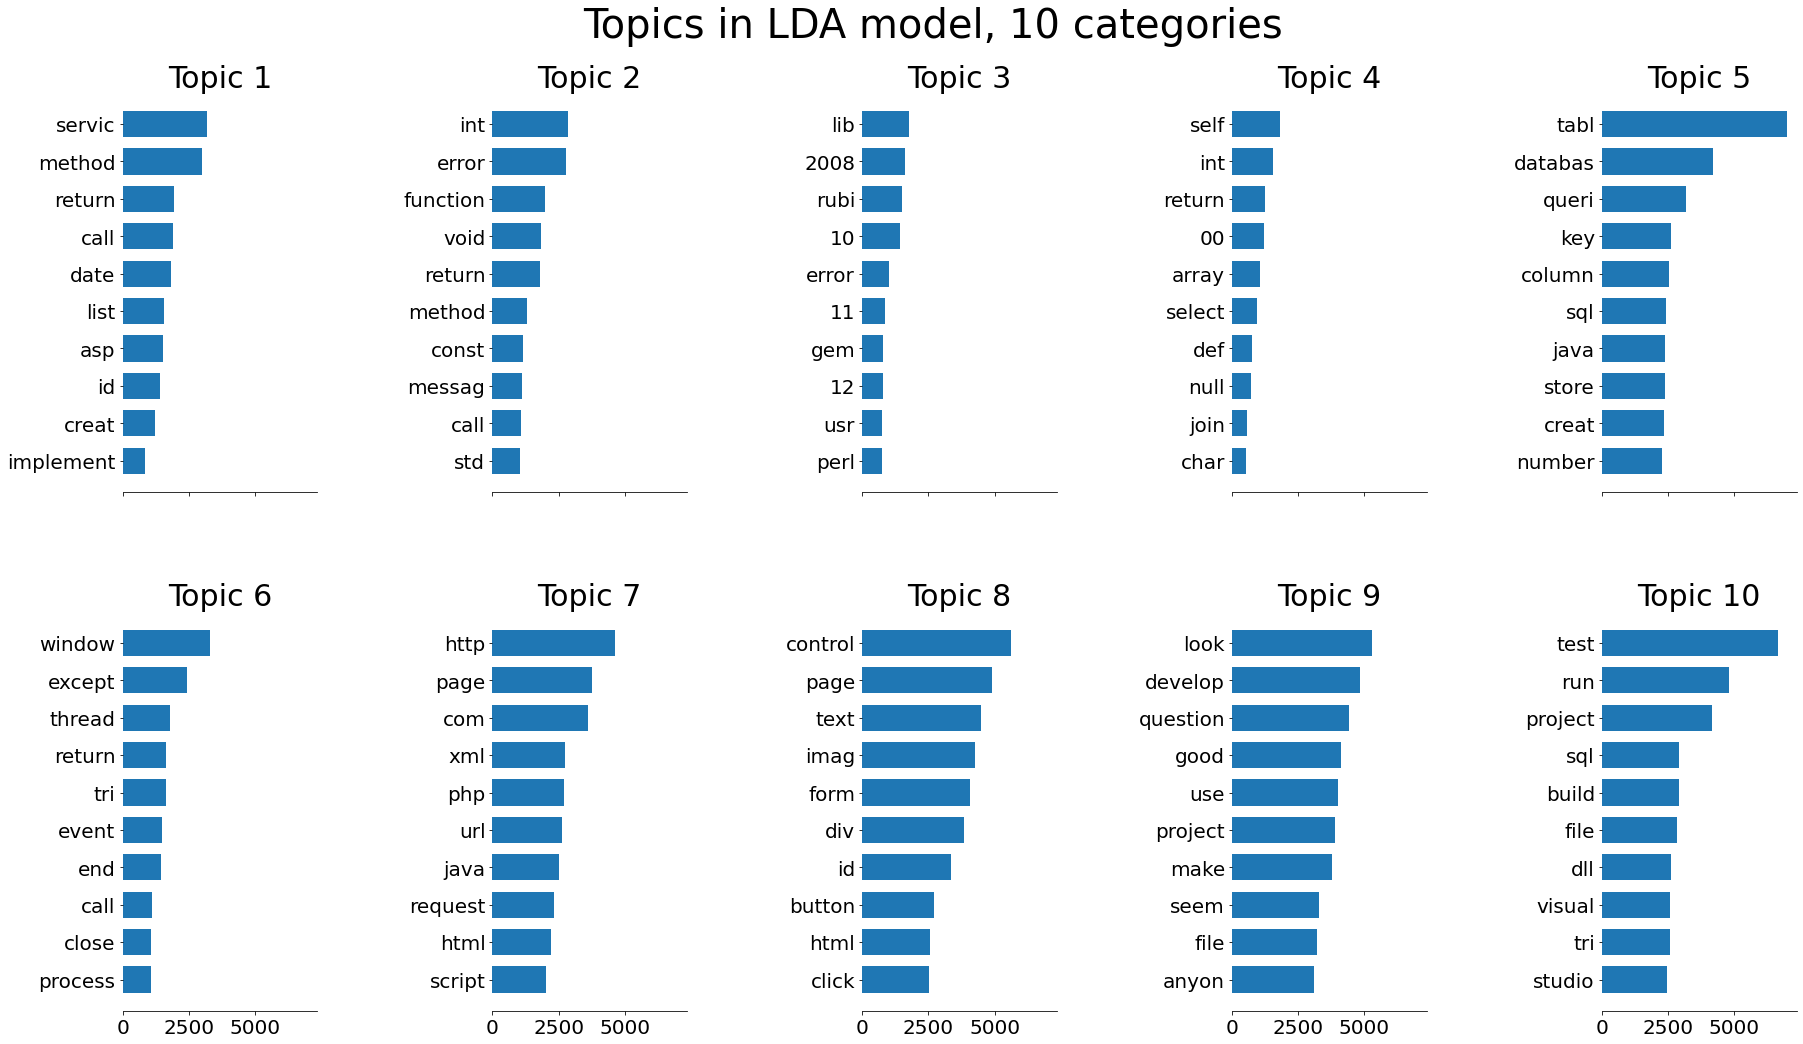

In [237]:
plot_top_words(lda, cv.get_feature_names(), 2, 10, 'Topics in LDA model, 10 categories')

In [137]:
lda_tr = lda.transform(tf)
groupes = [x.argmax() for x in lda_tr]

In [139]:
%%time
sil = silhouette_score(tf, groupes)

Wall time: 1min 36s


In [140]:
sil

-0.060693434468997685

In [142]:
%%time
lda5 = LatentDirichletAllocation(n_components=5)
lda5_tr = lda5.fit_transform(tf)
groupes5 = [x.argmax() for x in lda5_tr]

Wall time: 3min 58s


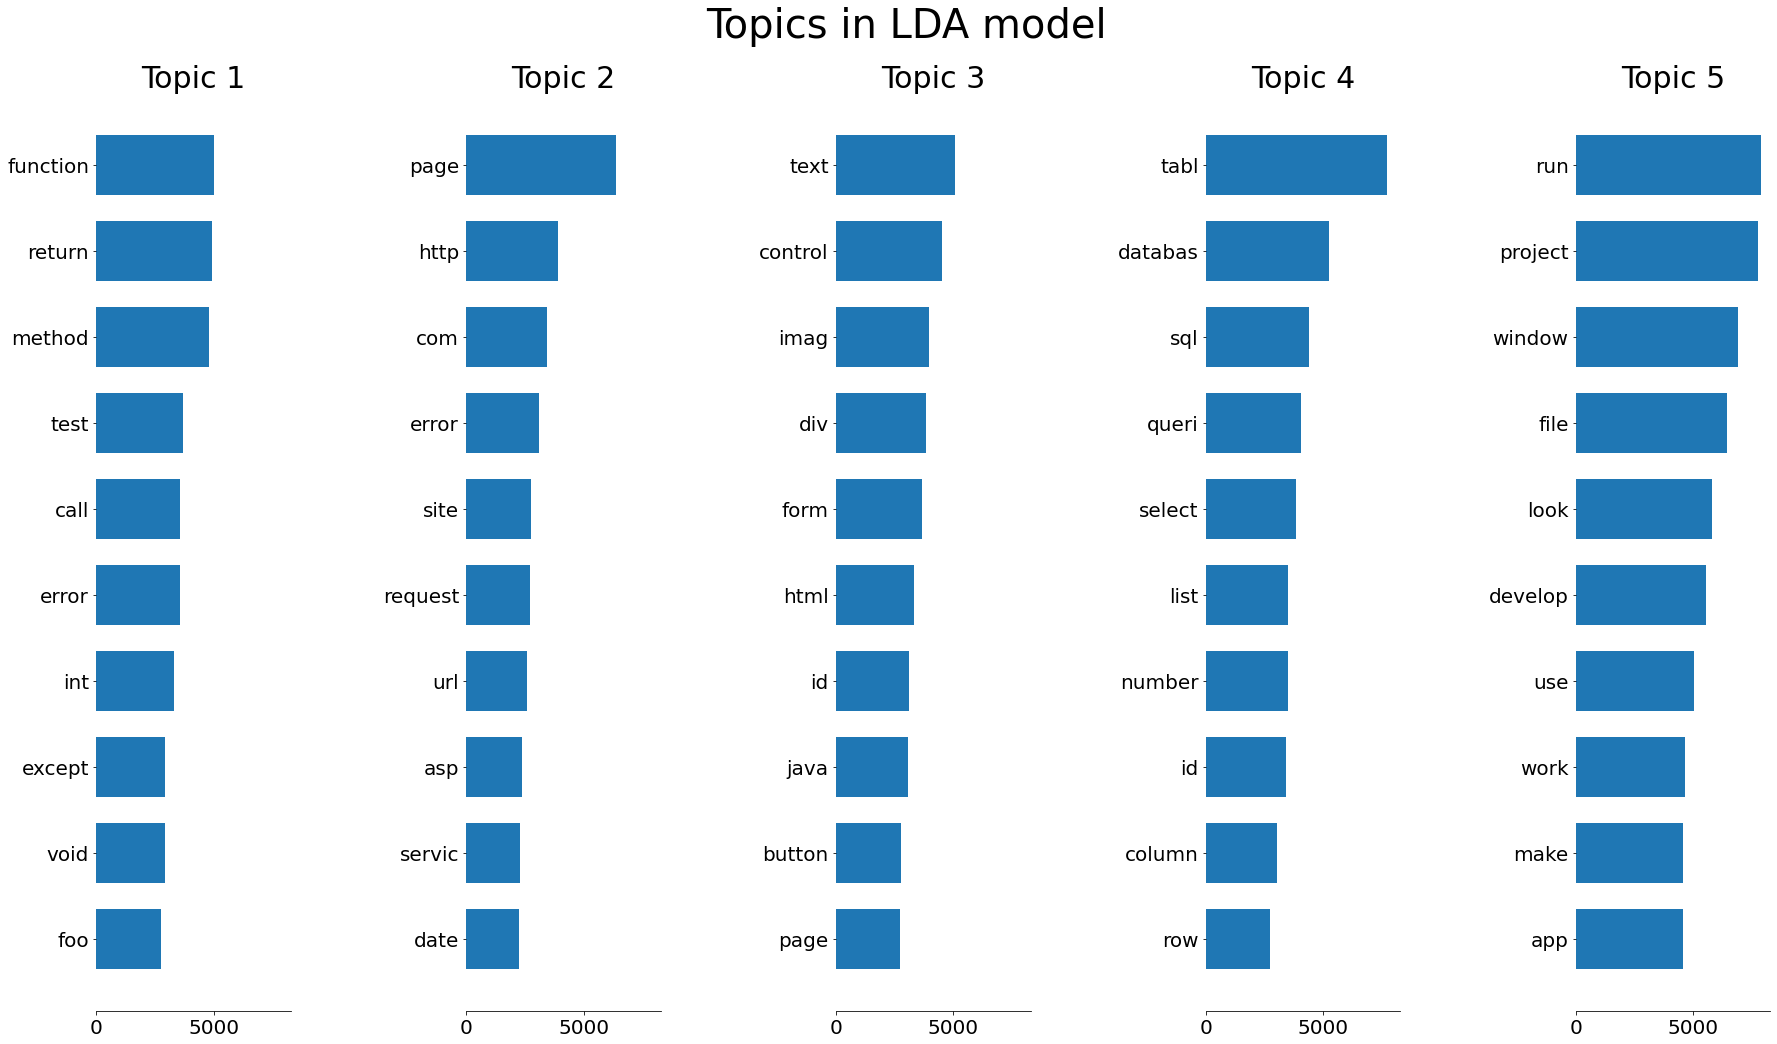

In [212]:
plot_top_words(lda5, cv.get_feature_names(), 1, 10, 'Topics in LDA model')

In [143]:
%%time
sil5 = silhouette_score(tf, groupes5)
print(sil5)

-0.01909629314645347
Wall time: 3min


In [144]:
%%time
lda20 = LatentDirichletAllocation(n_components=20)
lda20_tr = lda20.fit_transform(tf)
groupes20 = [x.argmax() for x in lda20_tr]

Wall time: 2h 23min 29s


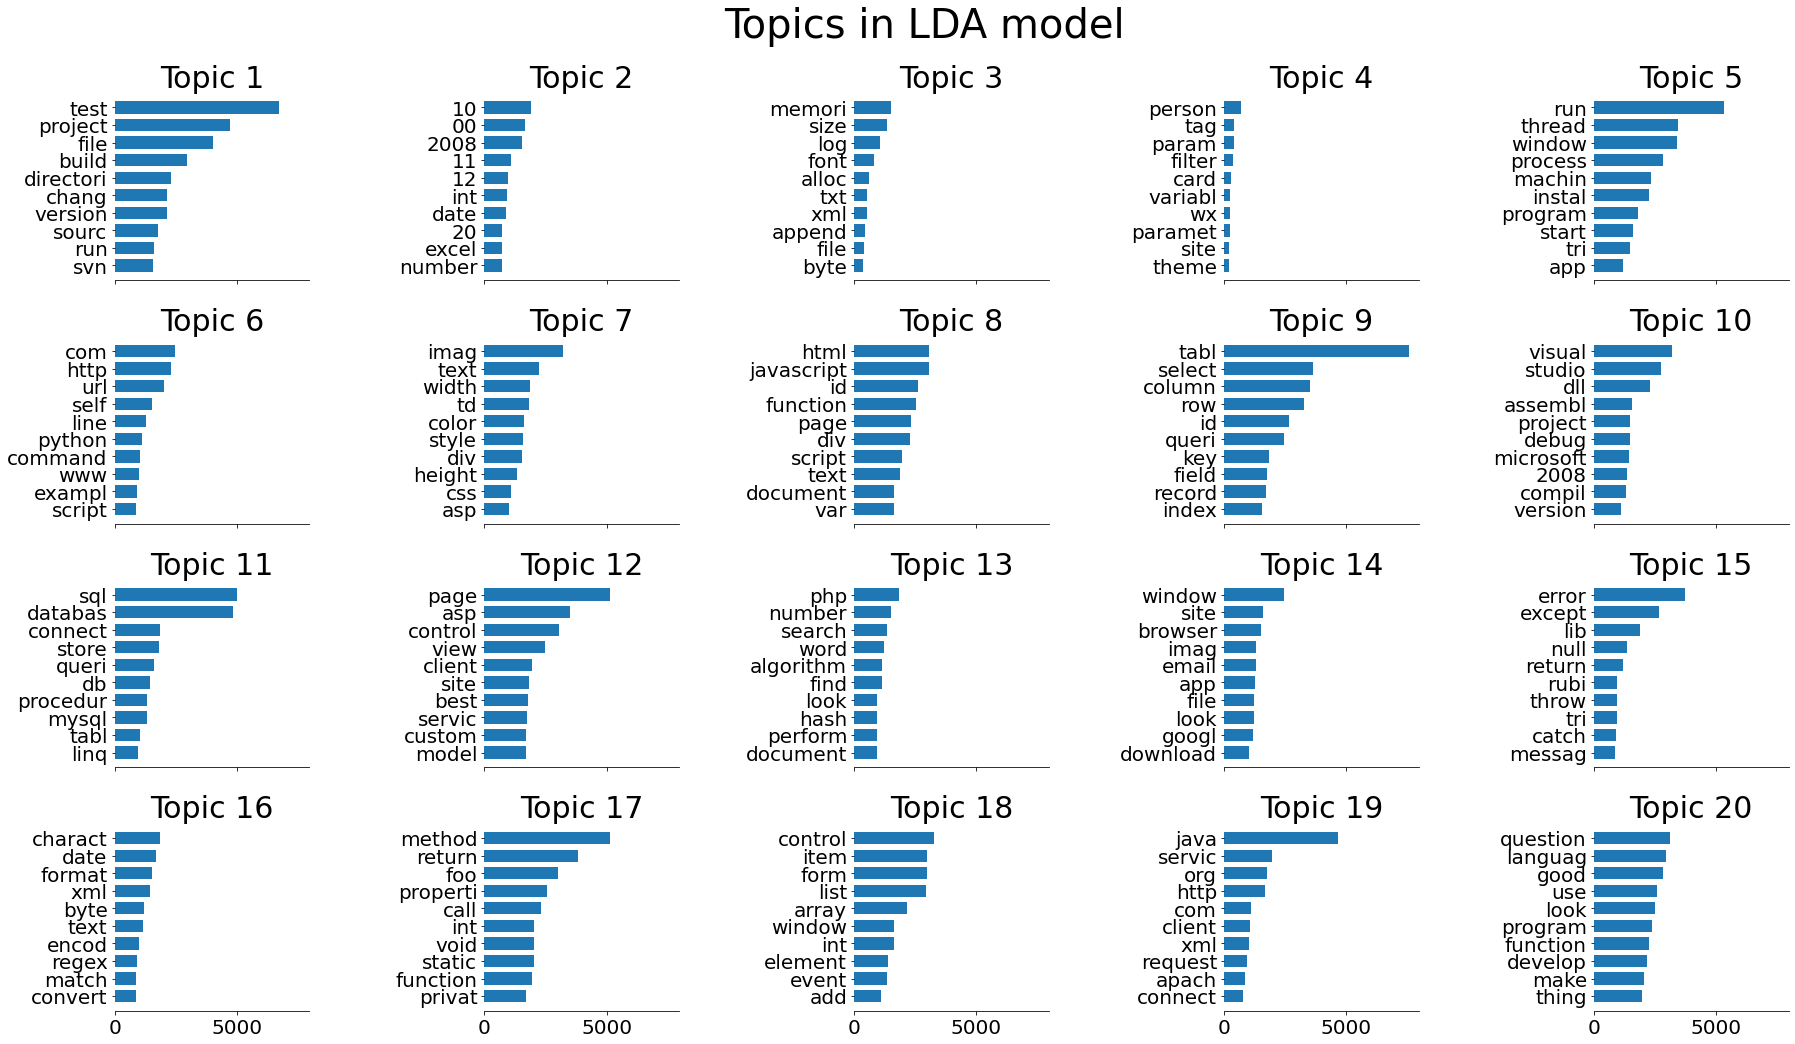

In [214]:
plot_top_words(lda20, cv.get_feature_names(), 4, 10, 'Topics in LDA model')

In [145]:
%%time
sil20 = silhouette_score(tf, groupes20)
print(sil20)

-0.09011031526771243
Wall time: 3min 34s


In [149]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = pd.DataFrame(tsne.fit_transform(tf))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.025s...
[t-SNE] Computed neighbors for 50000 samples in 269.214s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for 

In [272]:
centres = tsne_results[0].between(-15, 15) & tsne_results[1].between(-15, 15)

In [273]:
centres = list(centres)

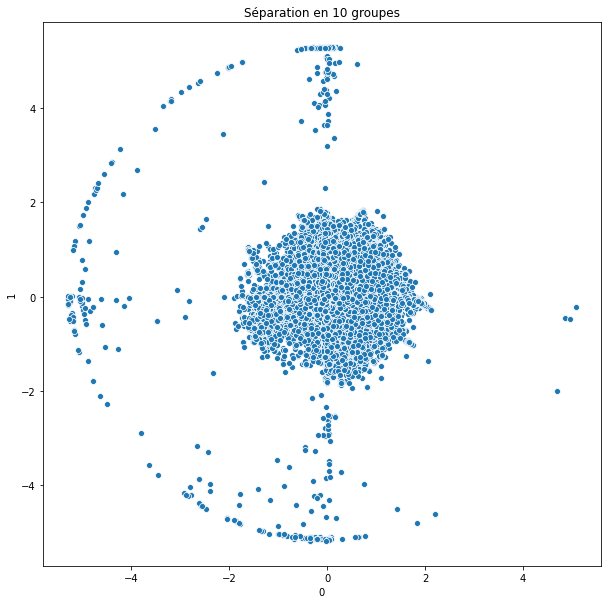

In [274]:
plt.figure(figsize=(10, 10))
plt.title("Séparation en 10 groupes")

sns.scatterplot(tsne_results[0][centres], tsne_results[1][centres])

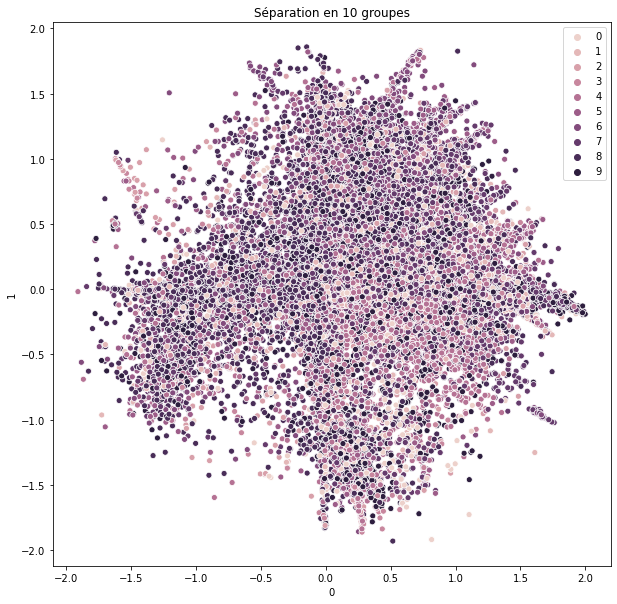

In [202]:
plt.figure(figsize=(10, 10))
plt.title("Séparation en 10 groupes")

sns.scatterplot(tsne_results[0][centres], tsne_results[1][centres],
                hue=np.array(groupes)[np.array(centres)], legend="full")

### Essayons maintenant la NMF

In [146]:
nmf = NMF()

In [147]:
%%time
nmf.fit(tf)

MemoryError: Unable to allocate 75.5 GiB for an array with shape (100684, 100684) and data type float64

In [216]:
data.Tags

0        <c#><floating-point><type-conversion><double><...
1                         <html><css><internet-explorer-7>
2                                     <c#><.net><datetime>
3        <c#><datetime><time><datediff><relative-time-s...
4        <html><browser><timezone><user-agent><timezone...
                               ...                        
49995                     <macos><unix><list><shell><file>
49996                            <c++><visual-studio><sdl>
49997                                       <coding-style>
49998                                    <version-control>
49999                          <ant><automation><makefile>
Name: Tags, Length: 50000, dtype: object

In [236]:
def tag_counter(donnees):
    """Cette fonction donne les tags de donnees et leur fréquence."""
    tok_tags = donnees.Tags.apply(tokenizer.tokenize)
    return tok_tags.apply(Counter).sum()

In [225]:
common_tags = tag_counter(data)

In [226]:
common_tags.most_common(20)

[('c', 11342),
 ('net', 10868),
 ('sql', 4865),
 ('asp', 4337),
 ('java', 3970),
 ('server', 2877),
 ('javascript', 2440),
 ('visual', 2364),
 ('windows', 2240),
 ('php', 2052),
 ('studio', 2034),
 ('python', 1966),
 ('database', 1558),
 ('ruby', 1534),
 ('html', 1441),
 ('web', 1178),
 ('mysql', 1062),
 ('testing', 1040),
 ('xml', 1001),
 ('css', 949)]

In [233]:
%%time
tags_groupe = list()
for i in range(10):
    tags_groupe.append(tag_counter(data[np.array(groupes) == i]))

Wall time: 2min 19s


In [242]:
i=1
for tg in tags_groupe:
    print("Topic ", i, "\n", tg.most_common(10))
    i+=1

Topic  1 
 [('c', 889), ('net', 864), ('asp', 307), ('sql', 250), ('java', 229), ('linq', 191), ('wcf', 164), ('services', 129), ('web', 126), ('git', 102)]
Topic  2 
 [('c', 1042), ('net', 344), ('java', 149), ('asp', 100), ('php', 75), ('visual', 70), ('javascript', 66), ('xml', 53), ('templates', 52), ('generics', 50)]
Topic  3 
 [('sql', 197), ('ruby', 187), ('c', 169), ('net', 88), ('python', 85), ('server', 84), ('regex', 80), ('rails', 74), ('on', 73), ('java', 62)]
Topic  4 
 [('c', 290), ('sql', 133), ('python', 110), ('net', 103), ('java', 51), ('server', 50), ('cocoa', 48), ('string', 44), ('arrays', 43), ('objective', 36)]
Topic  5 
 [('sql', 2282), ('c', 1768), ('net', 1112), ('server', 1080), ('java', 807), ('database', 805), ('mysql', 546), ('performance', 346), ('linq', 326), ('php', 302)]
Topic  6 
 [('c', 1005), ('net', 757), ('exception', 188), ('windows', 187), ('java', 164), ('sql', 162), ('multithreading', 144), ('vb', 123), ('winforms', 122), ('python', 99)]
Topi

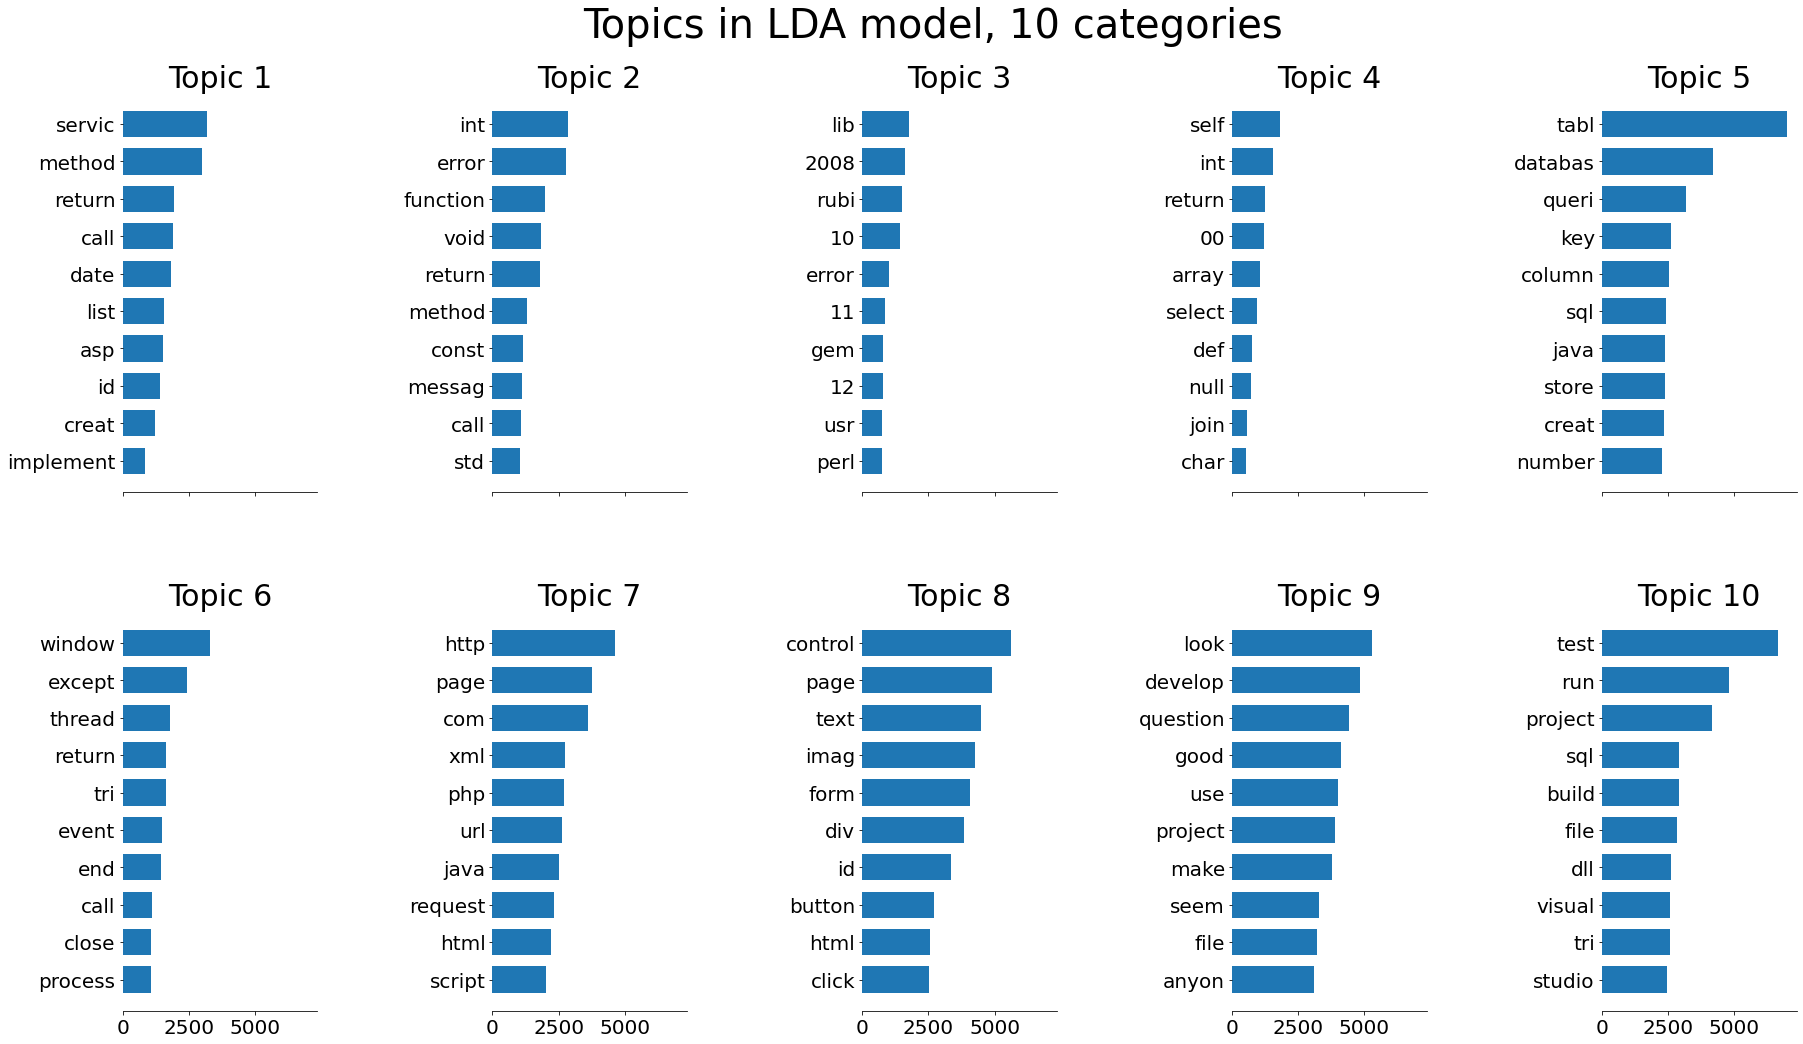

In [238]:
plot_top_words(lda, cv.get_feature_names(), 2, 10, 'Topics in LDA model, 10 categories')